In [42]:
import os
import sys
sys.path.append(os.path.abspath(r"//Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/B2"))

import B2_landmarks as b2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


In [6]:
def get_data_B2():

#     print("Hi")

    X_B2, y_B2 = b2.extract_features_labels()
    Y_B2 = np.array([y_B2, -(y_B2 - 1)]).T
    
#     print("Hi number 2")

    # Rescaling Data
    scaler = StandardScaler()
    temp_X_reshape = X_B2.reshape(len(X_B2), len(X_B2[0]) * len(X_B2[0][0]))
    temp_X_B2 = scaler.fit_transform(temp_X_reshape)
    
#     print("This is tiring.")

    tr_X_B2, te_X_B2, tr_Y_B2, te_Y_B2 = train_test_split(temp_X_B2, Y_B2, test_size=0.3, random_state=0)

#     print("Why am I single")

#     print(tr_X_B2.shape)
#     print(te_X_B2.shape)
#     print(tr_Y_B2.shape)
#     print(te_Y_B2.shape)
    
    return tr_X_B2, tr_Y_B2, te_X_B2, te_Y_B2
# get_data_B2()


# def get_data_B2():
#     x, y = gdB2()

#     trx, tr_y, tex, tey = gdb2(x, y)

#     return trx, tr_y, tex, tey


In [7]:
def B2_SVM(training_images, training_labels, test_images, test_labels):
#     classifier = svm.SVC(kernel='linear', C = 0.05)
    tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100]},
                        {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C':[1, 10, 100]},
                        {'kernel': ['poly'], 'degree': [2, 3], 'C': [1, 10, 100]}
                        ]
    classifier = GridSearchCV(svm.SVC(), tuned_parameters, n_jobs = -1)
#     lab_enc = preprocessing.LabelEncoder()
    classifier.fit(training_images, training_labels)
                                
#  SVM Accuracy
    acc_B2_train = classifier.best_score_

#  Choosing the best accuracy using GridSearchCV
    pred_B2 = classifier.best_estimator_.predict(test_images)
    acc_B2_test = accuracy_score(test_labels, pred_B2)
    
    print(classifier.best_estimator_)
    print()
    print(classifier.best_params_)
    
    return acc_B2_train, acc_B2_test, pred_B2
#     pred = classifier.predict(test_images)
#     print(pred)
#     print("Accuracy:", accuracy_score(test_labels, pred))
    


In [8]:
# Run B2 accuracy test(MAIN.py)
from datetime import datetime
start = datetime.now()
    
tr_X_B2, tr_Y_B2, te_X_B2, te_Y_B2= get_data_B2()

model_B2 = B2_SVM(tr_X_B2, list(zip(*tr_Y_B2))[0], te_X_B2, list(zip(*te_Y_B2))[0])

acc_B2_train, acc_B2_test, pred_B2 = model_B2

print('TB2:{},{}'.format(acc_B2_train, acc_B2_test))

print(datetime.now() - start)

# from datetime import datetime
# start = datetime.now()
    
# try:
# 	tr_X_B2, tr_Y_B2, te_X_B2, te_Y_B2= get_data_B2()

# 	model_B2 = B2_SVM(tr_X_B2, list(zip(*tr_Y_B2))[0], te_X_B2, list(zip(*te_Y_B2))[0])

# 	acc_B2_train, acc_B2_test, pred_B2 = model_B2
    
#     print('TB2:{},{}'.format(acc_B2_train, acc_B2_test))
# except Exception as e:
# 	print(e)

# print(datetime.now() - start)

/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


TB2:0.47410636442894505,0.4871899145994307
0:15:57.291025


In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

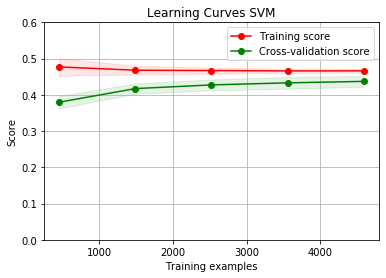

In [11]:
# Learning Curve
title = "Learning Curves SVM"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='rbf', gamma=1e-3, C=100)
X, y = tr_X_B2, list(zip(*tr_Y_B2))[0]
plot_learning_curve(estimator, title, X, y, (0, 0.6), cv=cv, n_jobs=-1)

plt.show()

[[265 111  70  27  30]
 [121 171  71 103  18]
 [115 134 118  91  18]
 [ 63 111  50 243  23]
 [ 39  23  18  25 401]]


<function matplotlib.pyplot.show(*args, **kw)>

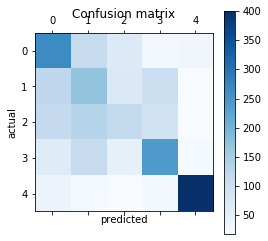

In [12]:
test_label = list(zip(*te_Y_B2))[0]
cf = confusion_matrix(test_label, pred_B2)
print(cf)

cmap = plt.cm.Blues

plt.matshow(cf, cmap = cmap)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show

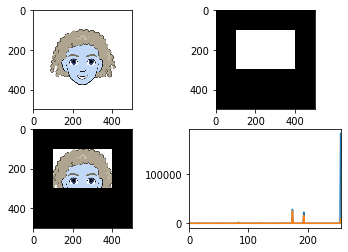

In [14]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/B2/eye_color.dat')

basedir = '/Users/shyhhao/Documents/AML_Assignment/AMLSassignment19_-20_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set'
images_dir = os.path.join(basedir, 'img')
ex_img_path = os.path.join(images_dir, '4.png')
img = cv2.imread(ex_img_path)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

## Testing certain parts of the code

In [ ]:
def gdb1(): 
    X_B1, y_B1 = b1.extract_features_labels()

    return X_B1, y_B1

x, y = gdb1()

In [ ]:
def gdb2(x, y):
    X_B1 = x
    Y_B1 = y
    print(len(X_B1))
    print(len(Y_B1))
#     Y_B1 = np.array([y_B1, -(y_B1 - 1)]).T
    
#     # Rescaling Data
#     scaler = StandardScaler()
#     temp_X_reshape = X_B1.reshape(len(X_B1), len(X_B1[0]) * len(X_B1[0][0]))
#     temp_X_B1 = scaler.fit_transform(temp_X_reshape)
    
#     tr_X_B1, te_X_B1, tr_Y_B1, te_Y_B1 = train_test_split(temp_X_B1, Y_B1, test_size=0.3, random_state=0)

#     print(tr_X_B1.shape)
#     print(te_X_B1.shape)
#     print(tr_Y_B1.shape)
#     print(te_Y_B1.shape)
    
#     return tr_X_B1, tr_Y_B1, te_X_B1, te_Y_B1

In [ ]:
gdb2(x, y)

### Moving on to CNN as SVM produces very low accuracy and lots of image pre-processing functions to do before running through SVM

#### Importing the relevant libraries for CNN

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import pandas as pd
from sklearn import svm
from keras.preprocessing.image import ImageDataGenerator

srcdir = '/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/img'

Using TensorFlow backend.
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shyhhao/anaconda3/lib/python3.7/site-packag

### Importing data, setting dataframe and append color to relative numbers

In [3]:
df = pd.read_csv("/Users/shyhhao/Documents/AMLSassignment19_-20_LSH_SN16067637/AMLS_19-20_LSH_SN16067637/dataset_AMLS_19-20/dataset_AMLS_19-20/cartoon_set/labels.csv")
df = pd.DataFrame(df).reset_index()
df.columns = ['Index', 'Total']
del df['Index']
df['eye_color'] = df['Total'].str.split('\t').str[1]
df['face_shape'] = df['Total'].str.split('\t').str[2]
df['img_name'] = df['Total'].str.split('\t').str[3]
del df['Total']
df
# del df['Index']
# df['Index'] = df['Total'].str.split('\t').str[0]

eyescolor = []
for i in range(len(df.eye_color)):
    if df.eye_color.loc[i] == '0':
        eyescolor.append('brown')
    elif df.eye_color.loc[i] == '1':
        eyescolor.append('blue')
    elif df.eye_color.loc[i] == '2':
        eyescolor.append('green')
    elif df.eye_color.loc[i] == '3':
        eyescolor.append('gray')
    elif df.eye_color.loc[i] == '4':
        eyescolor.append('black')
df['colors'] = eyescolor
df

,eye_color,face_shape,img_name,colors
0,1,4,0.png,blue
1,2,4,1.png,green
2,2,3,2.png,green
3,2,0,3.png,green
4,0,2,4.png,brown
...,...,...,...,...
9995,3,2,9995.png,gray
9996,0,3,9996.png,brown
9997,1,2,9997.png,blue
9998,0,2,9998.png,brown


### Splitting data

In [5]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
print(len(train))
print(len(test))

8000
2000


### Generating training and validation data

In [6]:
xcol = 'img_name'
ycol = 'colors'

print('Receiving data..')
data = ImageDataGenerator(rescale = 1./255.,
                          validation_split = 0.25,
                          horizontal_flip = True,
                          vertical_flip = True
                         )

print('Arranging training dataset..')
train_gen = data.flow_from_dataframe(dataframe = train,
                                     directory = srcdir,
                                     x_col = xcol,
                                     y_col = ycol,
                                     class_mode = 'categorical',
                                     target_size = (64,64),
                                     batch_size = 32,
                                     subset = 'training'
                                    )

print('Arranging validation dataset..')
val_gen = data.flow_from_dataframe(dataframe = train,
                                   directory = srcdir,
                                   x_col = xcol,
                                   y_col = ycol,
                                   class_mode = 'categorical',
                                   target_size = (64,64),
                                   batch_size = 32,
                                   subset = 'validation'
                                  )

Receiving data..
Arranging training dataset..
Found 6000 validated image filenames belonging to 5 classes.
Arranging validation dataset..
Found 2000 validated image filenames belonging to 5 classes.


### Convolutional Neural Network - Setting layers of matrix

In [24]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(24, (3,3), input_shape=train_gen.image_shape))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(24, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(48, (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(96, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(5))
model.add(Activation("softmax"))

opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 24)        672       
_________________________________________________________________
activation_25 (Activation)   (None, 62, 62, 24)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 24)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 29, 29, 24)        5208      
_________________________________________________________________
activation_26 (Activation)   (None, 29, 29, 24)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 27, 27, 48)        10416     
_________________________________________________________________
activation_27 (Activation)   (None, 27, 27, 48)        0         
__________

### Training data on CNN and calibrating epoch

In [25]:
from datetime import datetime
start = datetime.now()
cnn_training = model.fit_generator(train_gen, 
                                   steps_per_epoch = train_gen.samples // 32,
                                   validation_data = val_gen, 
                                   validation_steps = val_gen.samples // 32,
                                   epochs = 25
                                  )
print(datetime.now() - start)

Epoch 1/25
187/187 [==============================] - 37s 200ms/step - loss: 1.4195 - acc: 0.3441 - val_loss: 1.1145 - val_acc: 0.5457
Epoch 2/25
187/187 [==============================] - 36s 194ms/step - loss: 0.8865 - acc: 0.6771 - val_loss: 0.5608 - val_acc: 0.8135
Epoch 3/25
187/187 [==============================] - 37s 200ms/step - loss: 0.4752 - acc: 0.8088 - val_loss: 0.4049 - val_acc: 0.8323
Epoch 4/25
187/187 [==============================] - 36s 195ms/step - loss: 0.3935 - acc: 0.8262 - val_loss: 0.3844 - val_acc: 0.8298
Epoch 5/25
187/187 [==============================] - 36s 192ms/step - loss: 0.3718 - acc: 0.8322 - val_loss: 0.3735 - val_acc: 0.8308
Epoch 6/25
187/187 [==============================] - 41s 218ms/step - loss: 0.3667 - acc: 0.8371 - val_loss: 0.3854 - val_acc: 0.8176
Epoch 7/25
187/187 [==============================] - 41s 222ms/step - loss: 0.3564 - acc: 0.8411 - val_loss: 0.3430 - val_acc: 0.8491
Epoch 8/25
187/187 [==============================] - 4

### Plotting learning curve

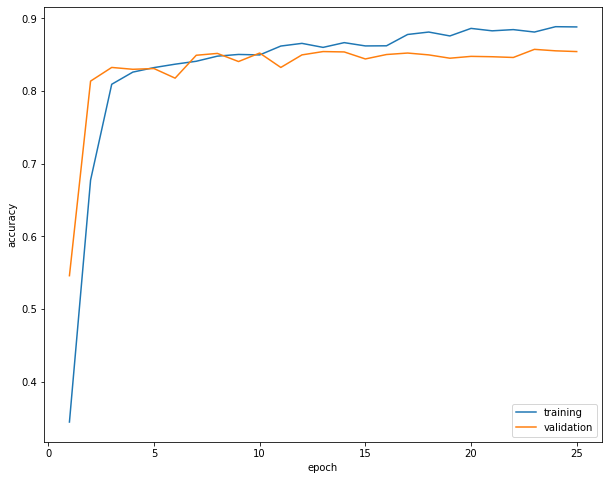

In [34]:
num_epochs = 25
epoch_nums = range(1,num_epochs+1)
training_acc = cnn_training.history["acc"]
validation_acc = cnn_training.history["val_acc"]
plt.figure(figsize=(10,8))
plt.plot(epoch_nums, training_acc)
plt.plot(epoch_nums, validation_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

### Plotting error graph

Generating predictions from validation data..


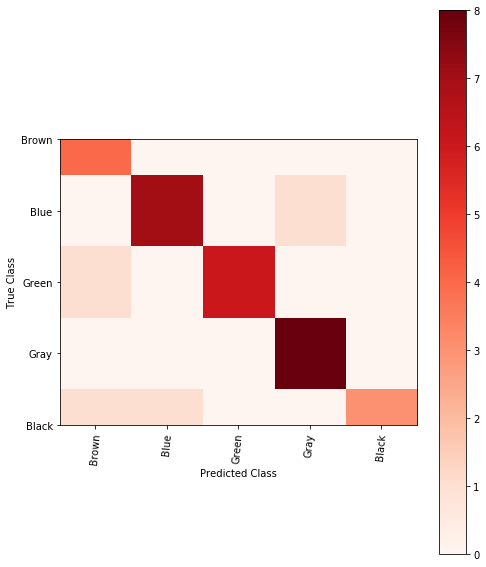

In [35]:
print("Generating predictions from validation data..")

x_test = val_gen[0][0]
y_test = val_gen[0][1]

class_probabilities = model.predict(x_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

classes = ["Brown", "Blue", "Green", "Gray" , "Black"]

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Reds)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes , rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()